In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 30
pd.options.display.max_rows = 100

In [6]:
file_list = ['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI','PJME','PJMW','PJM_Load','pjm_est']
df_dict = {}
for i in file_list:
    df_dict[i] = pd.read_csv('./data/'+i+'_hourly.csv')


we will be excluding 'pjm_est' in analysis for now

convert all datetime columns to datetime type

In [19]:
for i in range(12):
    key = file_list[i]
    df_dict[key].iloc[:,0] = pd.to_datetime(df_dict[key].iloc[:,0])

add new column with constant variable to each df and combine df to create graph of overlapping time periods

In [32]:
for i in range(12):
    key = file_list[i]
    df_dict[key]['location_value'] = i+1
    df_dict[key]['location_key'] = key

In [33]:
df_dict['AEP'].sample(10)

,Datetime,AEP_MW,location_value,location_key
36677,2008-01-25 15:00:00,19918.0,1,AEP
13584,2006-09-13 05:00:00,12582.0,1,AEP
103878,2016-05-25 04:00:00,10898.0,1,AEP
85416,2014-07-04 21:00:00,12809.0,1,AEP
31124,2008-09-12 05:00:00,13637.0,1,AEP
30852,2008-09-24 21:00:00,17796.0,1,AEP
16384,2006-05-20 21:00:00,13474.0,1,AEP
65529,2012-10-09 04:00:00,12693.0,1,AEP
53667,2010-02-16 18:00:00,20062.0,1,AEP
62661,2011-02-06 14:00:00,16393.0,1,AEP


In [37]:
combined_df = pd.DataFrame(columns=['datetime','mw','location_value','location_key'])
for i in range(12):
    key = file_list[i]
    adjusted_df = df_dict[key].copy()
    adjusted_df.columns=['datetime','mw','location_value','location_key']
    combined_df = pd.concat([combined_df, adjusted_df], ignore_index=True)

In [54]:
combined_df.sample(5)

,datetime,mw,location_value,location_key
284267,2015-03-29 13:00:00,1864.0,3,DAYTON
586331,2016-03-16 09:00:00,1477.0,6,DUQ
651647,2011-07-06 02:00:00,7231.0,8,FE
205338,2006-03-31 06:00:00,1716.0,3,DAYTON
256516,2012-05-28 04:00:00,1610.0,3,DAYTON


In [82]:
df_describe = pd.DataFrame(columns=['location','min_date','max_date','mw_count','mw_mean','mw_std','mw_min','mw_25','mw_50','mw_75','mw_max'])

for i in range(12):
    key = file_list[i]
    temp_df = df_dict[key]
    description = temp_df.iloc[:,1].describe().round()
    
    df_desc = pd.DataFrame({'location':key,
              'min_date':temp_df.Datetime.min(),
              'max_date':temp_df.Datetime.max(),
              'mw_count':description[0],
              'mw_mean':description[1],
              'mw_std':description[2],
              'mw_min':description[3],
              'mw_25':description[4],
              'mw_50':description[5],
              'mw_75':description[6],
              'mw_max':description[7]},index=[i])
    df_describe = pd.concat([df_describe, df_desc])
    
    print(key)
    print(f'Earliest datetime: {temp_df.Datetime.min()}')
    print(f'Latest   datetime: {temp_df.Datetime.max()}\n')
    print('MW Description:')
    print(temp_df.iloc[:,1].describe())
    print('\n')
        
          

AEP
Earliest datetime: 2004-10-01 01:00:00
Latest   datetime: 2018-08-03 00:00:00

MW Description:
count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64


COMED
Earliest datetime: 2011-01-01 01:00:00
Latest   datetime: 2018-08-03 00:00:00

MW Description:
count    66497.000000
mean     11420.152112
std       2304.139517
min       7237.000000
25%       9780.000000
50%      11152.000000
75%      12510.000000
max      23753.000000
Name: COMED_MW, dtype: float64


DAYTON
Earliest datetime: 2004-10-01 01:00:00
Latest   datetime: 2018-08-03 00:00:00

MW Description:
count    121275.000000
mean       2037.851140
std         393.403153
min         982.000000
25%        1749.000000
50%        2009.000000
75%        2279.000000
max        3746.000000
Name: DAYTON_MW, dtype: float64


DEOK
Earliest datetime: 2012-01-01 01:00:00
Latest   dat

In [87]:
df_describe.columns

Index(['location', 'min_date', 'max_date', 'mw_count', 'mw_mean', 'mw_std',
       'mw_min', 'mw_25', 'mw_50', 'mw_75', 'mw_max'],
      dtype='object')

In [91]:
df_describe.sort_values(by=['min_date'],axis=0)

,location,min_date,max_date,mw_count,mw_mean,mw_std,mw_min,mw_25,mw_50,mw_75,mw_max
11,PJM_Load,1998-04-01 01:00:00,2002-01-01,32896.0,29766.0,5850.0,17461.0,25473.0,29655.0,33073.0,54030.0
9,PJME,2002-01-01 01:00:00,2018-08-03,145366.0,32080.0,6464.0,14544.0,27573.0,31421.0,35650.0,62009.0
10,PJMW,2002-04-01 01:00:00,2018-08-03,143206.0,5602.0,979.0,487.0,4907.0,5530.0,6252.0,9594.0
8,NI,2004-05-01 01:00:00,2011-01-01,58450.0,11702.0,2371.0,7003.0,9954.0,11521.0,12897.0,23631.0
0,AEP,2004-10-01 01:00:00,2018-08-03,121273.0,15500.0,2591.0,9581.0,13630.0,15310.0,17200.0,25695.0
2,DAYTON,2004-10-01 01:00:00,2018-08-03,121275.0,2038.0,393.0,982.0,1749.0,2009.0,2279.0,3746.0
5,DUQ,2005-01-01 01:00:00,2018-08-03,119068.0,1659.0,302.0,1014.0,1444.0,1630.0,1819.0,3054.0
4,DOM,2005-05-01 01:00:00,2018-08-03,116189.0,10949.0,2414.0,1253.0,9322.0,10501.0,12378.0,21651.0
1,COMED,2011-01-01 01:00:00,2018-08-03,66497.0,11420.0,2304.0,7237.0,9780.0,11152.0,12510.0,23753.0
7,FE,2011-06-01 01:00:00,2018-08-03,62874.0,7792.0,1331.0,0.0,6807.0,7700.0,8556.0,14032.0


### plotting time overlaps

In [118]:
combined_df.location_value = combined_df.location_value.astype('int32')
combined_df.location_value.dtype

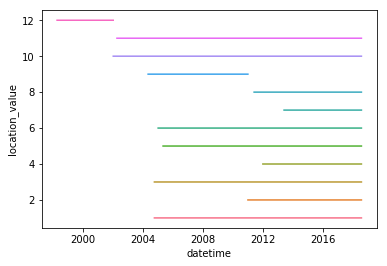

In [123]:
sns.lineplot('datetime','location_value', hue='location_key', data=combined_df, legend=False)